In [1]:
import cv2 as cv
import pysift
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
image = cv.imread("/media/jasongong/Media/data/covid_train_test/train/positive/000012-1.jpg", 0)

In [53]:
sift = cv.SIFT_create()
kp = sift.detect(image,None)
image_withkp=cv.drawKeypoints(image,kp,image)

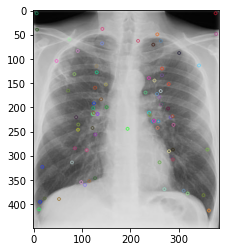

In [58]:
plt.imshow(image_withkp)

In [41]:
des_total.shape

(780857, 128)

In [43]:
rows_id = np.random.choice(range(des_total.shape[0]), 10000, replace=False)

In [45]:
tse_des = des_total[rows_id,:]

In [46]:
tse_des.shape

(10000, 128)

In [47]:
kmeans_clusters = kmeans.predict(tse_des)
kmeans_distances = kmeans.transform(tse_des)

In [48]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=1000)
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.127s...
[t-SNE] Computed neighbors for 10000 samples in 18.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 133.036473
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.856987
[t-SNE] KL divergence after 1000 iterations: 2.197475


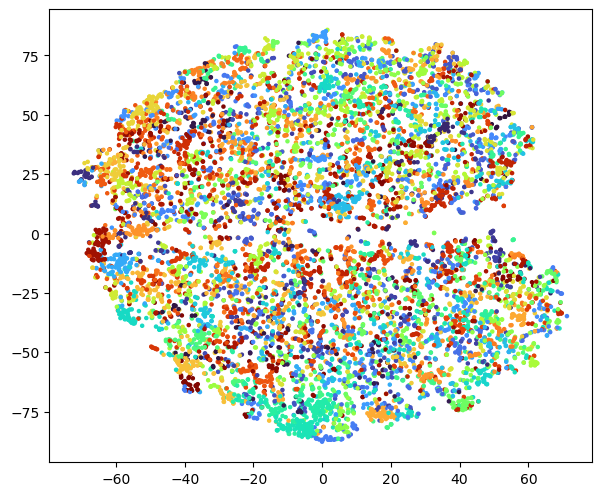

In [49]:
from bokeh.palettes import Turbo256

# setup data
step = len(Turbo256) / 200
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['color'] = [Turbo256[int(i * step)] for i in kmeans_clusters.tolist()]

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


fig, ax = plt.subplots(figsize=(7, 6), dpi=100)

ax.scatter(kmeans_df['x'], kmeans_df['y'], color=kmeans_df['color'], s = 5)

<BarContainer object of 200 artists>

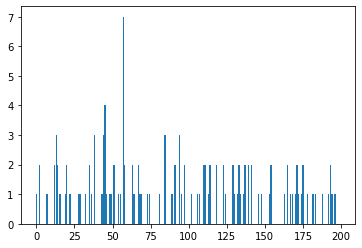

In [51]:
plt.bar(range(200),X_tr[0,:])

In [54]:
from sklearn import decomposition

In [55]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_tr)

PCA(n_components=2)

In [56]:
X_tr_plot = pca.transform(X_tr)

In [102]:

clf_plot = SVC(C=1)

In [103]:
clf_plot.fit(X_tr_plot, y_tr)

SVC(C=1)

In [104]:
h = 1
x_min, x_max = X_tr_plot[:, 0].min() - 1, X_tr_plot[:, 0].max() + 1
y_min, y_max = X_tr_plot[:, 1].min() - 1, X_tr_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [105]:
yy.shape

(80, 320)

In [106]:

Z = clf_plot.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

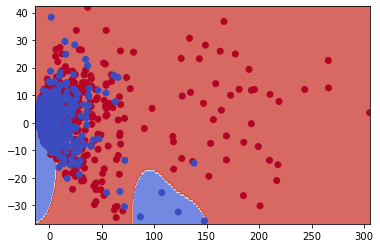

In [107]:
# Put the result into a color plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_tr_plot[:, 0], X_tr_plot[:, 1], c=y_tr, cmap=plt.cm.coolwarm)

In [ ]:
plt.bar(range(1,129), des[0,:])